<a href="https://colab.research.google.com/github/Abh1-Shek/stock_analysis/blob/main/stockPricePredictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
import pandas_datareader as web
import datetime as dt

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

In [ ]:
company = 'AAPL'

In [ ]:
start = dt.datetime(2012, 1, 1)
end = dt.datetime(2020, 1, 1)

In [ ]:
!pip3 install yfinance
import yfinance as yahooFinance
 
 
data = yahooFinance.Ticker(company)

In [ ]:
cdata = yahooFinance.Ticker(company)

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))

In [ ]:
data = data.history(start = start, end = end)

In [ ]:
data['Close']

Date
2012-01-03    12.591939
2012-01-04    12.659609
2012-01-05    12.800155
2012-01-06    12.933967
2012-01-09    12.913450
                ...    
2019-12-24    70.027313
2019-12-26    71.416679
2019-12-27    71.389565
2019-12-30    71.813278
2019-12-31    72.337990
Name: Close, Length: 2012, dtype: float64

In [ ]:
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1, 1)) #reshape for (n, ) to (n, 1)

In [ ]:
print (scaled_data[0: 2])
print (scaled_data[0: 2, 0])

[[0.00759649]
 [0.00872051]]
[0.00759649 0.00872051]


In [ ]:
prediction_days = 60

In [ ]:
x_train, y_train = [], []

In [ ]:
for x in range(prediction_days, len(scaled_data)):
  x_train.append(scaled_data[x - prediction_days: x, 0])
  y_train.append(scaled_data[x, 0])

In [ ]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train

array([[0.00759649, 0.00872051, 0.01105503, ..., 0.10715733, 0.11097191,
        0.11256901],
       [0.00872051, 0.01105503, 0.01327769, ..., 0.11097191, 0.11256901,
        0.1086221 ],
       [0.01105503, 0.01327769, 0.01293691, ..., 0.11256901, 0.1086221 ,
        0.10337842],
       ...,
       [0.69170089, 0.69928893, 0.72454144, ..., 0.96051402, 0.96161883,
        0.9846967 ],
       [0.69928893, 0.72454144, 0.72474528, ..., 0.96161883, 0.9846967 ,
        0.98424631],
       [0.72454144, 0.72474528, 0.71389371, ..., 0.9846967 , 0.98424631,
        0.99128435]])

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [ ]:
model = Sequential()

In [ ]:
x_train.shape

(1952, 60, 1)

In [ ]:
model.add(LSTM(units = 50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

In [ ]:
model.add(LSTM(units = 50, return_sequences=True))
model.add(Dropout(0.2))

In [ ]:
model.add(LSTM(units = 50))
model.add(Dropout(0.2))

In [ ]:
model.add(Dense(units = 1))  #our predictions

In [ ]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
model.fit(x_train, y_train, epochs = 25, batch_size = 32)

Epoch 1/25
61/61 [==============================] - 10s 76ms/step - loss: 0.0102
Epoch 2/25
61/61 [==============================] - 5s 77ms/step - loss: 0.0022
Epoch 3/25
61/61 [==============================] - 5s 77ms/step - loss: 0.0020
Epoch 4/25
61/61 [==============================] - 5s 78ms/step - loss: 0.0019
Epoch 5/25
61/61 [==============================] - 5s 79ms/step - loss: 0.0016
Epoch 6/25
61/61 [==============================] - 5s 79ms/step - loss: 0.0016
Epoch 7/25
61/61 [==============================] - 5s 80ms/step - loss: 0.0015
Epoch 8/25
61/61 [==============================] - 5s 79ms/step - loss: 0.0014
Epoch 9/25
61/61 [==============================] - 5s 79ms/step - loss: 0.0016
Epoch 10/25
61/61 [==============================] - 5s 77ms/step - loss: 0.0013
Epoch 11/25
61/61 [==============================] - 5s 77ms/step - loss: 0.0013
Epoch 12/25
61/61 [==============================] - 5s 79ms/step - loss: 0.0013
Epoch 13/25
61/61 [=================

In [ ]:
#let's do testing

In [ ]:
test_start = dt.datetime(2021, 1, 1)
test_end = dt.datetime.now()

In [ ]:
test_data = cdata.history(start = test_start, end = test_end)

In [ ]:
acutal_prices = test_data['Close'].values

In [ ]:
acutal_prices

array([128.61709595, 130.20730591, 125.82431793, 130.11784363,
       131.24092102, 128.18972778, 128.010849  , 130.08802795,
       128.12017822, 126.36101532, 127.04678345, 131.22103882,
       136.03138733, 138.21792603, 142.04431152, 142.28286743,
       141.18959045, 136.25004578, 131.15148926, 133.31813049,
       134.16290283, 133.11933899, 136.54821777, 136.12516785,
       136.2744751 , 135.37866211, 134.76153564, 134.50274658,
       134.74162292, 132.57174683, 130.23266602, 129.10791016,
       129.26715088, 125.41512299, 125.27577972, 124.76813507,
       120.42837524, 120.6971283 , 127.19681549, 124.53920746,
       121.49341583, 119.57237244, 120.85638428, 115.81987   ,
       120.52791595, 119.42307281, 121.39387512, 120.46819305,
       123.41445923, 124.98711395, 124.18088531, 119.97051239,
       119.43302155, 122.81724548, 121.97119141, 119.53255463,
       120.03022766, 120.64736176, 120.82653046, 119.34344482,
       121.58299255, 122.42905426, 125.3155899 , 125.62

In [ ]:
total_dataset = pd.concat((data['Close'], test_data['Close']), axis = 0)
total_dataset

Date
2012-01-03     12.591939
2012-01-04     12.659609
2012-01-05     12.800155
2012-01-06     12.933967
2012-01-09     12.913450
                 ...    
2021-11-15    150.000000
2021-11-16    151.000000
2021-11-17    153.490005
2021-11-18    157.869995
2021-11-19    160.550003
Name: Close, Length: 2236, dtype: float64

In [ ]:
model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values.reshape(-1, 1)

In [ ]:
model_inputs = scaler.transform(model_inputs)

In [ ]:
#make prediction on test data
x_test = []
for x in range(prediction_days, len(model_inputs)):
  x_test.append(model_inputs[x-prediction_days: x, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
predicted_prices = model.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices).reshape(-1, )

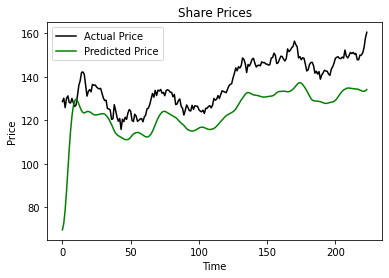

In [ ]:
plt.plot(acutal_prices, color = 'black', label = "Actual Price")
plt.plot(predicted_prices, color = 'green', label = "Predicted Price")
plt.title("Share Prices")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()